#230968078 Ishan Suryawanshi Week 1 Iris Dataset

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
y_encoded = to_categorical(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.3374 - loss: 1.1485 - val_accuracy: 0.5000 - val_loss: 1.1303
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3104 - loss: 1.1058 - val_accuracy: 0.5000 - val_loss: 1.0963
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3905 - loss: 1.0520 - val_accuracy: 0.5000 - val_loss: 1.0643
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5510 - loss: 1.0218 - val_accuracy: 0.6667 - val_loss: 1.0362
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7333 - loss: 0.9872 - val_accuracy: 0.6667 - val_loss: 1.0118
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8227 - loss: 0.9509 - val_accuracy: 0.6667 - val_loss: 0.9896
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8008 - loss: 0.9319 - val_accuracy: 0.6667 - val_loss: 0.9699
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8081 - loss: 0.9064 - val_accuracy: 0.6667 - val_loss: 0.9501


In [11]:
import matplotlib.pyplot as plt

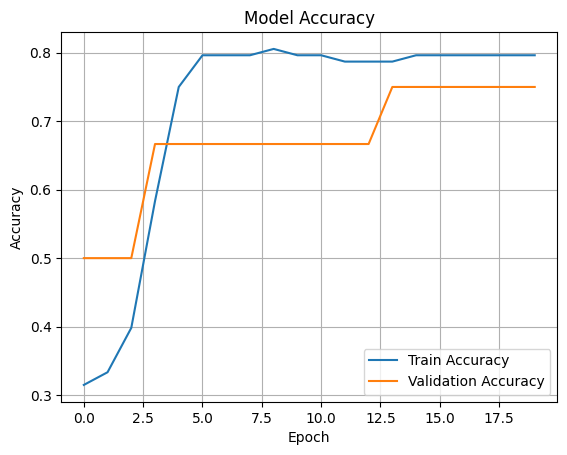

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy, loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8667 - loss: 0.5642
0.8666666746139526 0.5641873478889465
